# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset successfully loaded.")


Loading MNIST dataset...
Dataset successfully loaded.


## Part 2: Implement SVD for Dimensionality Reduction

In [6]:
import numpy as np

def apply_svd_custom(X_train, X_test, n_components):
    # Step 1: Compute the covariance matrix
    covariance_matrix = np.dot(X_train.T, X_train) / (X_train.shape[0] - 1)
    
    # Step 2: Compute the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # Step 3: Sort the eigenvectors by descending eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    # Step 4: Select the top 'n_components' eigenvectors to form the projection matrix
    top_eigenvectors = sorted_eigenvectors[:, :n_components]
    
    # Step 5: Project the training and test sets onto the reduced dimension space
    X_train_reduced = np.dot(X_train, top_eigenvectors)
    X_test_reduced = np.dot(X_test, top_eigenvectors)
    
    return X_train_reduced, X_test_reduced, top_eigenvectors


## Part 3: Train Logistic Regression and Measure Performance

In [3]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [12]:
# Define the number of SVD components to experiment with
svd_components = [784, 672, 560, 448, 336, 224, 112, 80, 50, 40, 20]

# Store the results and top eigenvectors for visualization
results = []
top_eigenvectors_list = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd, top_eigenvectors = apply_svd_custom(X_train, X_test, n_components)
    
    # Store the top eigenvectors for later visualization
    if n_components == 784:  # Use the full SVD (original space) for visualizing top 5 singular vectors
        top_eigenvectors_list = top_eigenvectors
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    
    # Print and store the results
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")
    results.append((n_components, accuracy, training_time))


Training models with different levels of SVD preprocessing...
Applying custom SVD with 784 components...
SVD components: 784, Accuracy: 0.9209, Training time: 512.8475 seconds
Applying custom SVD with 672 components...
SVD components: 672, Accuracy: 0.9209, Training time: 427.8460 seconds
Applying custom SVD with 560 components...
SVD components: 560, Accuracy: 0.9206, Training time: 343.7690 seconds
Applying custom SVD with 448 components...
SVD components: 448, Accuracy: 0.9202, Training time: 253.4883 seconds
Applying custom SVD with 336 components...
SVD components: 336, Accuracy: 0.9207, Training time: 166.4686 seconds
Applying custom SVD with 224 components...
SVD components: 224, Accuracy: 0.9203, Training time: 81.8194 seconds
Applying custom SVD with 112 components...
SVD components: 112, Accuracy: 0.9182, Training time: 34.4363 seconds
Applying custom SVD with 80 components...
SVD components: 80, Accuracy: 0.9166, Training time: 18.5275 seconds
Applying custom SVD with 50 com

## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


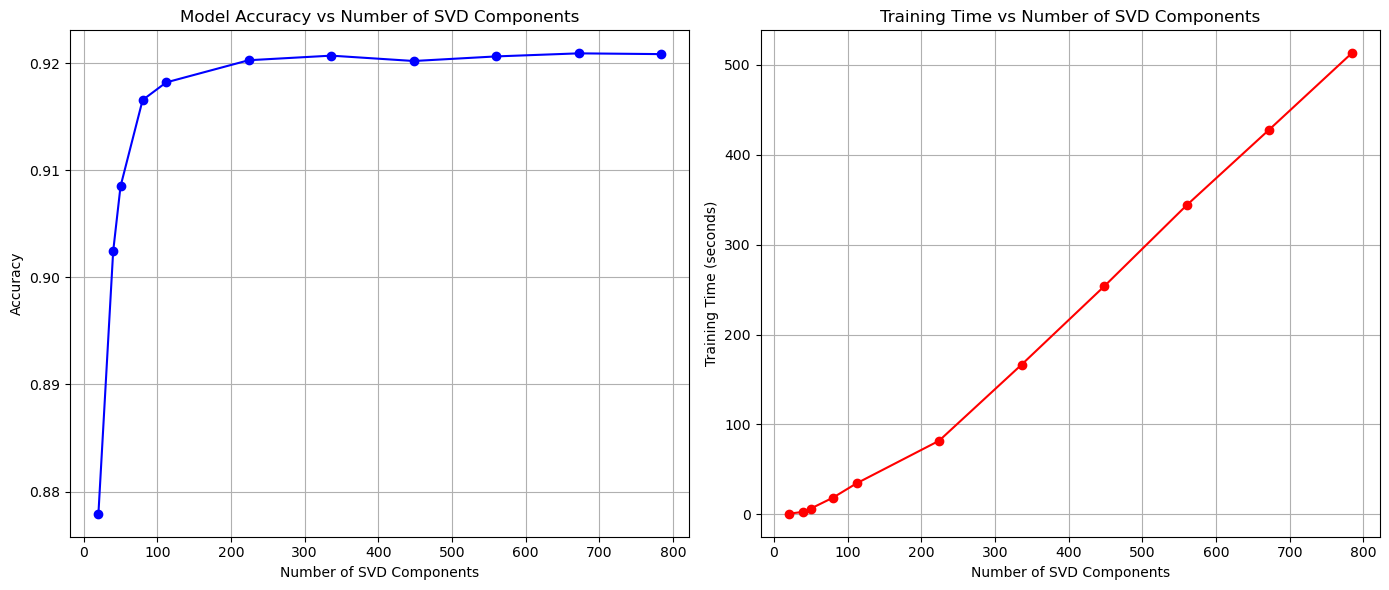

Visualizing the top 5 singular vectors...


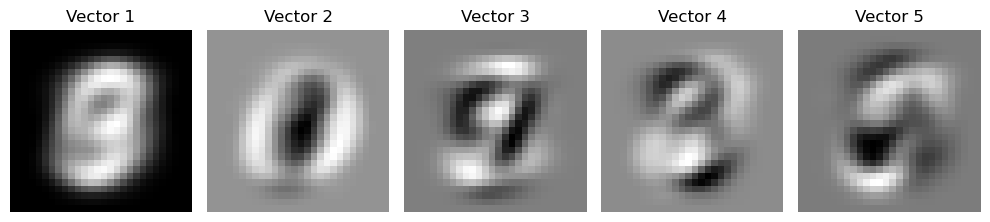

In [13]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
# Convert results to separate lists for easy plotting
svd_components = [result[0] for result in results]
accuracies = [result[1] for result in results]
training_times = [result[2] for result in results]

# Plot accuracy and training time as a function of the number of SVD components
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plotting Accuracy
plt.subplot(1, 2, 1)
plt.plot(svd_components, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs Number of SVD Components')
plt.grid(True)

# Plotting Training Time
plt.subplot(1, 2, 2)
plt.plot(svd_components, training_times, marker='o', linestyle='-', color='r')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs Number of SVD Components')
plt.grid(True)

plt.tight_layout()
plt.show()

# Plotting the top 5 singular vectors as 28x28 images
def visualize_singular_vectors(top_eigenvectors):
    plt.figure(figsize=(10, 5))
    
    for i in range(5):
        singular_vector = top_eigenvectors[:, i]  # Select the i-th singular vector
        image = singular_vector.reshape(28, 28)   # Reshape to 28x28 for visualization

        plt.subplot(1, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Vector {i + 1}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize the top 5 singular vectors (from the original space, 784 components)
print("Visualizing the top 5 singular vectors...")
visualize_singular_vectors(top_eigenvectors_list)

## Part 6: Analyze / Conclusion 

### Accuracy vs. Number of SVD Components:
- The accuracy improves significantly from 20 to 224 components and then starts to plateau.
- Beyond 336 components, there is minimal improvement in accuracy, suggesting diminishing returns.
- The maximum accuracy is around 0.92, achieved at 784 components. However, using 336 or 448 components yields a similar accuracy, showing that further components do not significantly improve the performance.

### Training Time vs. Number of SVD Components:
- The training time increases almost linearly with the number of components.
- When reducing components from 784 to 112, the training time drops significantly, from over 500 seconds to less than 10 seconds.
- This demonstrates that dimensionality reduction with SVD can substantially decrease computation time while retaining similar accuracy.

### Trade-off Analysis:
- **Optimal Components**: Using 336 components provides a good trade-off, achieving high accuracy (~0.92) with much lower training time compared to 784 components.
- **Efficiency vs. Performance**: Reducing dimensionality reduces training time without much loss in accuracy, which is beneficial for computational efficiency.

### Singular Vector Analysis:
- The top 5 singular vectors resemble common digit shapes, indicating that they capture the most significant features of the dataset.

### Conclusion:
- Using 336 components strikes an optimal balance between model accuracy and efficiency.
- SVD effectively reduces the dataset’s complexity, leading to faster training with minimal accuracy loss, making it a powerful tool for dimensionality reduction in large-scale data.
